# Premier League Points By Positions

Aim to investigate:

- How do points totals recently compare to early Premier League seasons?
- What has happened to the gap between the champions and relegation survivors?
- How many points do you tend to need to qualify for Europe recently?

## Package Import

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

## Get Data

We will be getting the league tables across all Premier League seasons from www.fbref.com

### Find table of season URLs

First need to access the table that stores all the URLs to each respective Premier League season.

In [2]:
url = 'https://fbref.com/en/comps/9/history/Premier-League-Seasons'
response = requests.get(url)
print(response)

comm = re.compile("<!--|-->")
soup = BeautifulSoup(comm.sub("", response.text), 'lxml')

all_tables = soup.find_all('table')

<Response [200]>


### Get URLs for all seasons

We can loop through the rows in that table to create the full URLs of each Premier League season.

In [3]:
season_rows = all_tables[0].find_all('th', {'data-stat':'season'})[1:]
season_urls = []
for season in range(len(season_rows)):
    
    if (season_rows[season].find('a')):
        url = season_rows[season].find('a').get('href')
    else: 
        next
    
    complete_url = 'https://fbref.com' + url
    season_urls.append(complete_url)
season_urls

['https://fbref.com/en/comps/9/Premier-League-Stats',
 'https://fbref.com/en/comps/9/1889/2018-2019-Premier-League-Stats',
 'https://fbref.com/en/comps/9/1631/2017-2018-Premier-League-Stats',
 'https://fbref.com/en/comps/9/1526/2016-2017-Premier-League-Stats',
 'https://fbref.com/en/comps/9/1467/2015-2016-Premier-League-Stats',
 'https://fbref.com/en/comps/9/733/2014-2015-Premier-League-Stats',
 'https://fbref.com/en/comps/9/669/2013-2014-Premier-League-Stats',
 'https://fbref.com/en/comps/9/602/2012-2013-Premier-League-Stats',
 'https://fbref.com/en/comps/9/534/2011-2012-Premier-League-Stats',
 'https://fbref.com/en/comps/9/467/2010-2011-Premier-League-Stats',
 'https://fbref.com/en/comps/9/400/2009-2010-Premier-League-Stats',
 'https://fbref.com/en/comps/9/338/2008-2009-Premier-League-Stats',
 'https://fbref.com/en/comps/9/282/2007-2008-Premier-League-Stats',
 'https://fbref.com/en/comps/9/229/2006-2007-Premiership-Stats',
 'https://fbref.com/en/comps/9/183/2005-2006-Premiership-Stat

### Store league tables for each season

Looping through all season URLs, we can safe each league table as its own dataframe in a dictionary.

In [4]:
season_league_table_dict = dict()
for season_url in season_urls[1:]:
    
    season = season_url.split("/")[-1].split("-Premier")[0]
    print(season)
    
    response = requests.get(season_url)
    print(response)

    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("", response.text), 'lxml')

    season_league_table = soup.find_all('table')[0]
    
    season_league_table_df = pd.read_html(str(season_league_table))[0]
    season_league_table_df['Season'] = season
    
    season_league_table_dict[season] = season_league_table_df

season_league_table_dict.keys()    

2018-2019
<Response [200]>
2017-2018
<Response [200]>
2016-2017
<Response [200]>
2015-2016
<Response [200]>
2014-2015
<Response [200]>
2013-2014
<Response [200]>
2012-2013
<Response [200]>
2011-2012
<Response [200]>
2010-2011
<Response [200]>
2009-2010
<Response [200]>
2008-2009
<Response [200]>
2007-2008
<Response [200]>
2006-2007
<Response [200]>
2005-2006
<Response [200]>
2004-2005
<Response [200]>
2003-2004
<Response [200]>
2002-2003
<Response [200]>
2001-2002
<Response [200]>
2000-2001
<Response [200]>
1999-2000
<Response [200]>
1998-1999
<Response [200]>
1997-1998
<Response [200]>
1996-1997
<Response [200]>
1995-1996
<Response [200]>
1994-1995
<Response [200]>
1993-1994
<Response [200]>
1992-1993
<Response [200]>


dict_keys(['2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007', '2005-2006', '2004-2005', '2003-2004', '2002-2003', '2001-2002', '2000-2001', '1999-2000', '1998-1999', '1997-1998', '1996-1997', '1995-1996', '1994-1995', '1993-1994', '1992-1993'])

For example, the 1995-1996 season below:

In [5]:
season_league_table_dict['1995-1996']

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes,Season
0,1,Manchester Utd,38,25,7,6,73,35,38,82,41001,Eric Cantona - 14,Peter Schmeichel,→ UEFA Champions League via league finish,1995-1996
1,2,Newcastle Utd,38,24,6,8,66,37,29,78,36501,Les Ferdinand - 25,Shaka Hislop,→ UEFA Cup via league finish,1995-1996
2,3,Liverpool,38,20,11,7,70,34,36,71,39553,Robbie Fowler - 28,David James,→ UEFA Cup Winners' Cup via cup win 1,1995-1996
3,4,Aston Villa,38,18,9,11,52,35,17,63,37492,Dwight Yorke - 17,Mark Bosnich,→ UEFA Cup via league finish,1995-1996
4,5,Arsenal,38,17,12,9,49,32,17,63,32614,Ian Wright - 15,David Seaman,→ UEFA Cup via league finish 2,1995-1996
5,6,Everton,38,17,10,11,64,44,20,61,27714,Andrei Kanchelskis - 16,Neville Southall,NaN,1995-1996
6,7,Blackburn,38,18,7,13,61,47,14,61,25163,Alan Shearer - 31,Tim Flowers,NaN,1995-1996
7,8,Tottenham,38,16,13,9,50,38,12,61,30548,Teddy Sheringham - 16,Ian Walker,NaN,1995-1996
8,9,Nott'ham Forest,38,15,13,10,50,54,-4,58,25953,"Ian Woan, Jason Lee... - 8",Mark Crossley,NaN,1995-1996
9,10,West Ham,38,14,9,15,43,52,-9,51,22335,"Tony Cottee, Julian Dicks - 10",Luděk Mikloško,NaN,1995-1996


### Combine all 38 game seasons

Each season is currently separately, we combine those altogether to create a single dataframe with all seasons. 

Note the first step removes the first 3 seasons of the Premier League as they are 42 game seasons, since we're looking at points totals in each season, these will skew the averages and positions required for relegation if included. Easiest to exclude for this analysis.

In [6]:
season_df_list = [ v for k,v in season_league_table_dict.items()][:-3] # remove 42 game seasons
master_season_df = pd.concat(season_df_list ,axis=0)
master_season_df

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Season
0,1,Manchester City,38,32,2,4,95,23,72,98,81.6,25.2,56.4,1.48,54130,Sergio Agüero - 21,Ederson,→ UEFA Champions League via league finish,2018-2019
1,2,Liverpool,38,30,7,1,89,22,67,97,72.9,29.8,43.1,1.13,52983,"Sadio Mané, Mohamed Salah - 22",Alisson,→ UEFA Champions League via league finish,2018-2019
2,3,Chelsea,38,21,9,8,63,39,24,72,57.9,34.8,23.1,0.61,40437,Eden Hazard - 16,Kepa Arrizabalaga,→ UEFA Champions League via league finish,2018-2019
3,4,Tottenham,38,23,2,13,67,39,28,71,54.4,45.7,8.7,0.23,54216,Harry Kane - 17,Hugo Lloris,→ UEFA Champions League via league finish,2018-2019
4,5,Arsenal,38,21,7,10,73,51,22,70,56.5,55.7,0.8,0.02,59899,Pierre-Emerick Aubameyang - 22,Bernd Leno,→ UEFA Europa League via league finish,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Coventry City,38,8,14,16,42,60,-18,38,NaN,NaN,NaN,NaN,18292,Dion Dublin - 14,Steve Ogrizovic,NaN,1995-1996
16,17,Southampton,38,9,11,18,34,52,-18,38,NaN,NaN,NaN,NaN,14802,Neil Shipperley - 8,Dave Beasant,NaN,1995-1996
17,18,Manchester City,38,9,11,18,33,58,-25,38,NaN,NaN,NaN,NaN,27747,Uwe Rösler - 9,Eike Immel,Relegated,1995-1996
18,19,QPR,38,9,6,23,38,57,-19,33,NaN,NaN,NaN,NaN,15672,Danny Dichio - 10,Juergen Sommer,Relegated,1995-1996


### Pivot to get seasons by rank by points

We're only interested in points and position by season, so pivot all seasons to only include what's necessary.

In [7]:
# Points and Position by Season
master_points_positions = master_season_df.pivot(index='Season', columns='Rk', values='Pts')
master_points_positions

Rk,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Season,,,,,,,,,,,,,,,,,,,,
1995-1996,82,78,71,63,63,61,61,61,58,51,50,43,43,41,40,38,38,38,33,29
1996-1997,75,68,68,68,61,59,57,56,47,46,46,46,42,42,42,41,41,40,39,34
1997-1998,78,77,65,63,59,58,57,56,55,53,52,48,44,44,44,44,40,40,35,33
1998-1999,79,78,75,67,57,55,54,52,51,49,47,46,46,43,42,42,41,36,35,30
1999-2000,91,73,69,67,65,58,58,55,55,53,52,52,50,44,44,38,36,33,31,24
2000-2001,80,70,69,68,66,61,57,54,52,52,51,49,48,42,42,42,42,34,34,26
2001-2002,87,80,77,71,66,64,53,50,50,46,45,45,44,44,43,40,40,36,30,28
2002-2003,83,78,69,67,64,60,59,52,51,50,49,49,48,48,47,45,44,42,26,19
2003-2004,90,79,75,60,56,56,53,53,52,50,48,47,45,45,44,41,39,33,33,33


## Points by Position per Season

### Data Wrangling

In [15]:
reset_points_positions = master_points_positions.reset_index()
reset_points_positions['Season'] = reset_points_positions['Season'].apply(lambda x: x.split("-")[0][-2:] + "/" + x.split("-")[1][-2:])
clean_points_positions = reset_points_positions.set_index('Season')
clean_points_positions

Rk,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Season,,,,,,,,,,,,,,,,,,,,
95/96,82,78,71,63,63,61,61,61,58,51,50,43,43,41,40,38,38,38,33,29
96/97,75,68,68,68,61,59,57,56,47,46,46,46,42,42,42,41,41,40,39,34
97/98,78,77,65,63,59,58,57,56,55,53,52,48,44,44,44,44,40,40,35,33
98/99,79,78,75,67,57,55,54,52,51,49,47,46,46,43,42,42,41,36,35,30
99/00,91,73,69,67,65,58,58,55,55,53,52,52,50,44,44,38,36,33,31,24
00/01,80,70,69,68,66,61,57,54,52,52,51,49,48,42,42,42,42,34,34,26
01/02,87,80,77,71,66,64,53,50,50,46,45,45,44,44,43,40,40,36,30,28
02/03,83,78,69,67,64,60,59,52,51,50,49,49,48,48,47,45,44,42,26,19
03/04,90,79,75,60,56,56,53,53,52,50,48,47,45,45,44,41,39,33,33,33


### Create plot

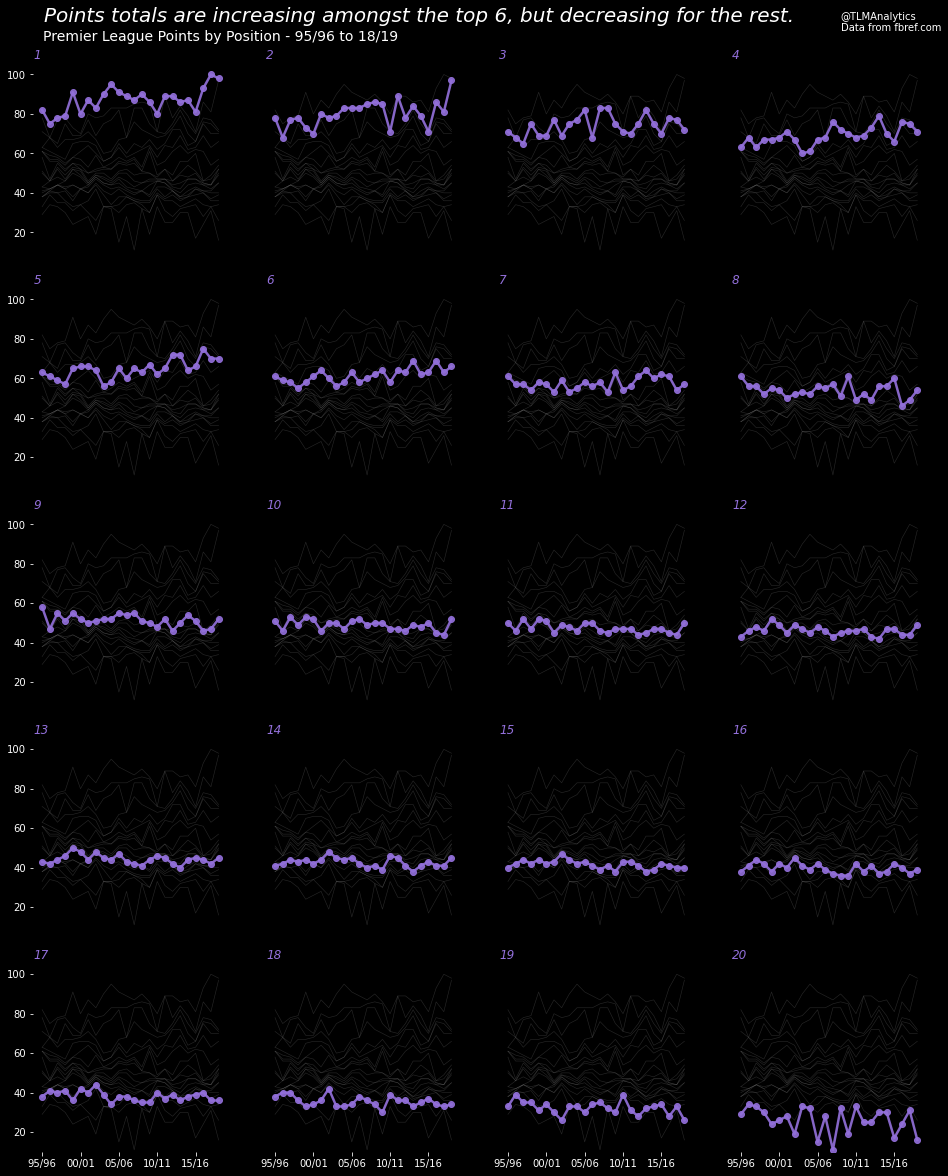

In [50]:
plt.style.use('dark_background')
plt.figure(figsize=(16,20))
palette = plt.get_cmap('Set1')
position = 0
for pos in clean_points_positions.columns:
    position+=1
    
    # Get correct subplot
    plt.subplot(5,4,pos)
    
    # Add all columns in background
    for col in clean_points_positions.columns:
        plt.plot(clean_points_positions.index, clean_points_positions[col], marker='', color='grey', linewidth=-.6, alpha=0.3)
    
    plt.plot(clean_points_positions.index, clean_points_positions[pos], marker='o', color = 'mediumpurple', linewidth=-2.5, alpha=0.9, label = pos)
    plt.xticks(ticks=('95/96', '00/01', '05/06', '10/11', '15/16'))
    plt.grid(False)
    plt.ylim(10,105)
    
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = False
    
    if position in range(17):
        plt.tick_params(labelbottom=False)#, axis = "x", which = "both", bottom = False, top = False)
        plt.xticks([])
    if position not in [1, 5, 9, 13, 17]:
        plt.tick_params(labelleft=False)
        plt.yticks([])
        
    plt.title(pos, loc='left', fontsize=12, color='mediumpurple', style='oblique')
    
plt.suptitle("Points totals are increasing amongst the top 6, but decreasing for the rest.", fontsize=20, color='white', style='italic', x=0.46, y=0.92)
plt.text(-91, 573, "Premier League Points by Position - 95/96 to 18/19", fontsize=14, color='white')
plt.text(13, 578, "@TLMAnalytics\nData from fbref.com", fontsize=10)

plt.savefig("Premier League Points Totals by Position.png", bbox_inches='tight')

## Gap between Champions and Survivors

### Data Wrangling

In [29]:
gap_points_positions = clean_points_positions[[1, 18]]
gap_points_positions['Survival'] = gap_points_positions[18] + 1
gap_points_positions

C:\Users\Ciaran\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Rk,1,18,Survival
Season,,,
95/96,82,38,39
96/97,75,40,41
97/98,78,40,41
98/99,79,36,37
99/00,91,33,34
00/01,80,34,35
01/02,87,36,37
02/03,83,42,43
03/04,90,33,34


### Create plot

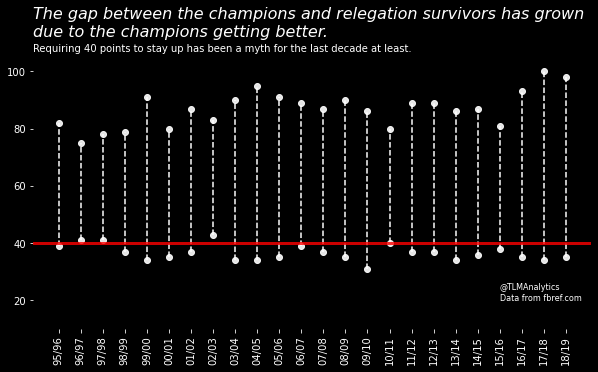

In [60]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(gap_points_positions.index, gap_points_positions[1], marker='o', alpha=0.9, color = 'w')
ax.scatter(gap_points_positions.index, gap_points_positions['Survival'], marker='o', alpha=0.9, color = 'w')
ylim_max = 105
ylim_min = 10
ax.set_ylim(ylim_min,ylim_max)

num=0
for pos in gap_points_positions.index:
    ymin = (gap_points_positions['Survival'].loc[pos] - ylim_min) / (ylim_max - ylim_min)
    ymax = (gap_points_positions[1].loc[pos] - ylim_min) / (ylim_max - ylim_min)
    ax.axvline(x=num, ymin=ymin, ymax=ymax, color='w', linestyle='dashed')
    num+=1

ax.axhline(y=40, color = 'r', alpha=0.8, linewidth = 3)
ax.tick_params(axis='x',labelrotation=90)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

plt.suptitle("The gap between the champions and relegation survivors has grown\ndue to the champions getting better.",
             color = 'w', fontsize=16, ha='left', x=0.125, y=1.02, style='italic')
plt.title("Requiring 40 points to stay up has been a myth for the last decade at least.",
          color = 'w', fontsize=10, loc='left')

plt.text(x=20, y=20, s="@TLMAnalytics\nData from fbref.com", fontsize=8, color='w')

plt.savefig("Champions and Survivors Gap.png", bbox_inches='tight')

## Points required for Europe

### Data Wrangling

In [19]:
europe_points_positions = clean_points_positions[[4, 7]]
europe_points_positions

Rk,4,7
Season,,
95/96,63,61
96/97,68,57
97/98,63,57
98/99,67,54
99/00,67,58
00/01,68,57
01/02,71,53
02/03,67,59
03/04,60,53


### Create plot

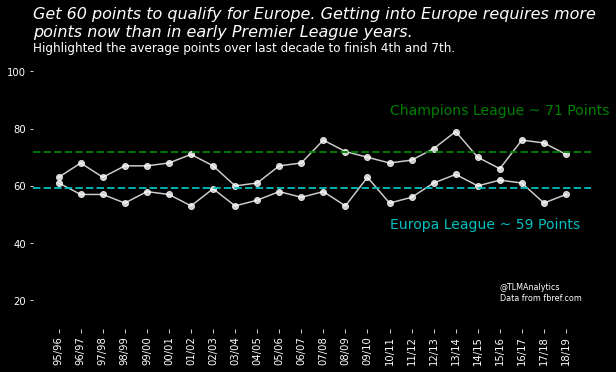

In [62]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(europe_points_positions.index, europe_points_positions[4], marker='o', alpha=0.8, color = 'w')
ax.plot(europe_points_positions.index, europe_points_positions[7], marker='o', alpha=0.8, color = 'w')
ylim_max = 105
ylim_min = 10
ax.set_ylim(ylim_min,ylim_max)

ax.tick_params(axis='x',labelrotation=90)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

ax.axhline(y=europe_points_positions[4][-10:].mean(), color = 'g', alpha=0.9, linewidth = 2, linestyle='dashed')
ax.axhline(y=europe_points_positions[7][-10:].mean(), color = 'c', alpha=0.9, linewidth = 2, linestyle='dashed')

plt.text(x=15, y=85, s='Champions League ~ 71 Points', color='g', fontsize=14)
plt.text(x=15, y=45, s='Europa League ~ 59 Points', color='c', fontsize=14)

plt.suptitle("Get 60 points to qualify for Europe. Getting into Europe requires more\npoints now than in early Premier League years.",
             color = 'w', fontsize=16, ha='left', x=0.125, y=1.02, style='italic')
plt.title("Highlighted the average points over last decade to finish 4th and 7th.",
          color = 'w', fontsize=12, loc='left')

plt.text(x=20, y=20, s="@TLMAnalytics\nData from fbref.com", fontsize=8, color='w')

plt.savefig("Qualifying for Europe.png", bbox_inches='tight')